In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [4]:
# Helper functions
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

We can generate a symmetric dataset where there is no inherent preference for clusters. This is to illustrate the dependence on the initial state of the algorithm. It will randomly initialise where the K means are placed before iterating. The final clusters will depend on this initialisation,

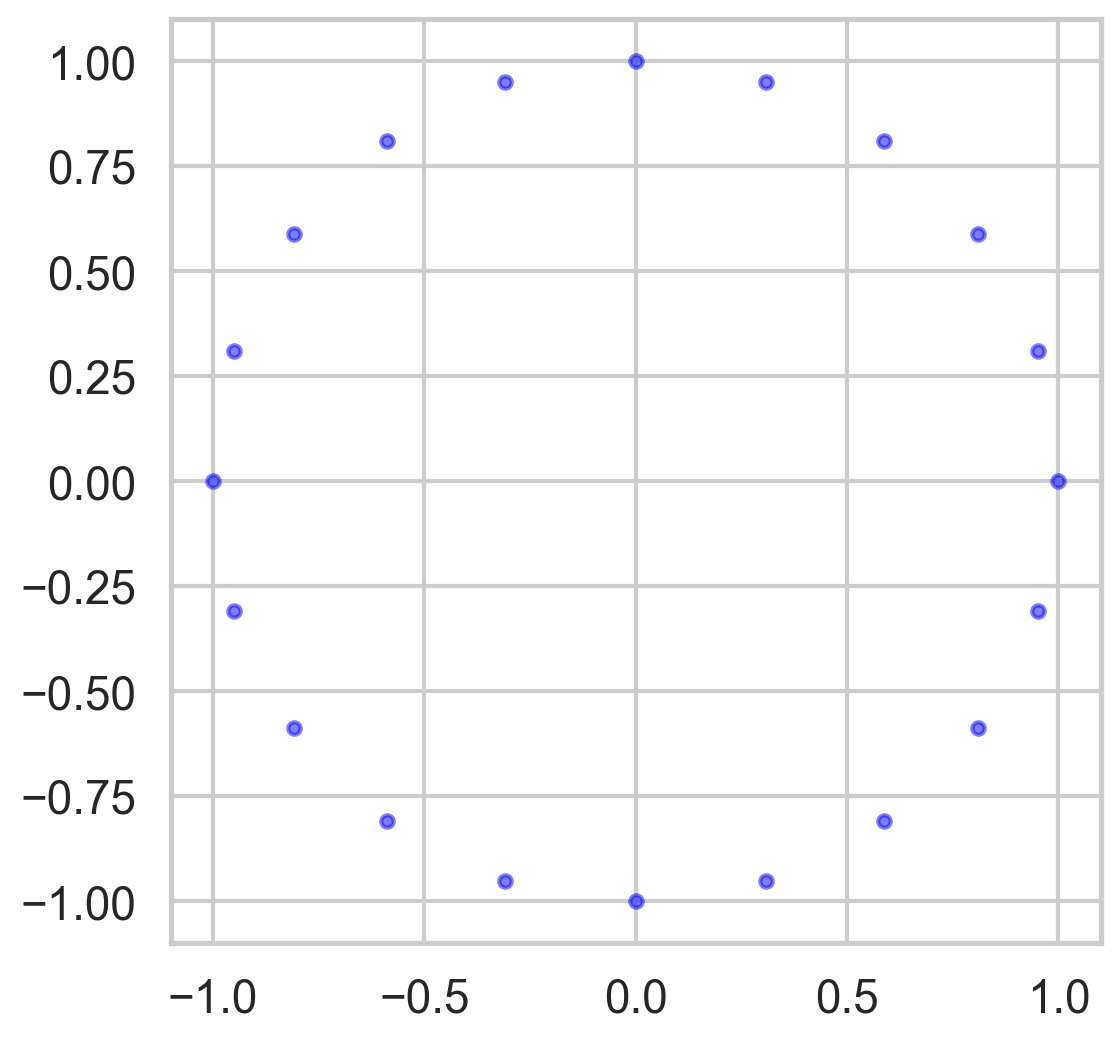

In [5]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

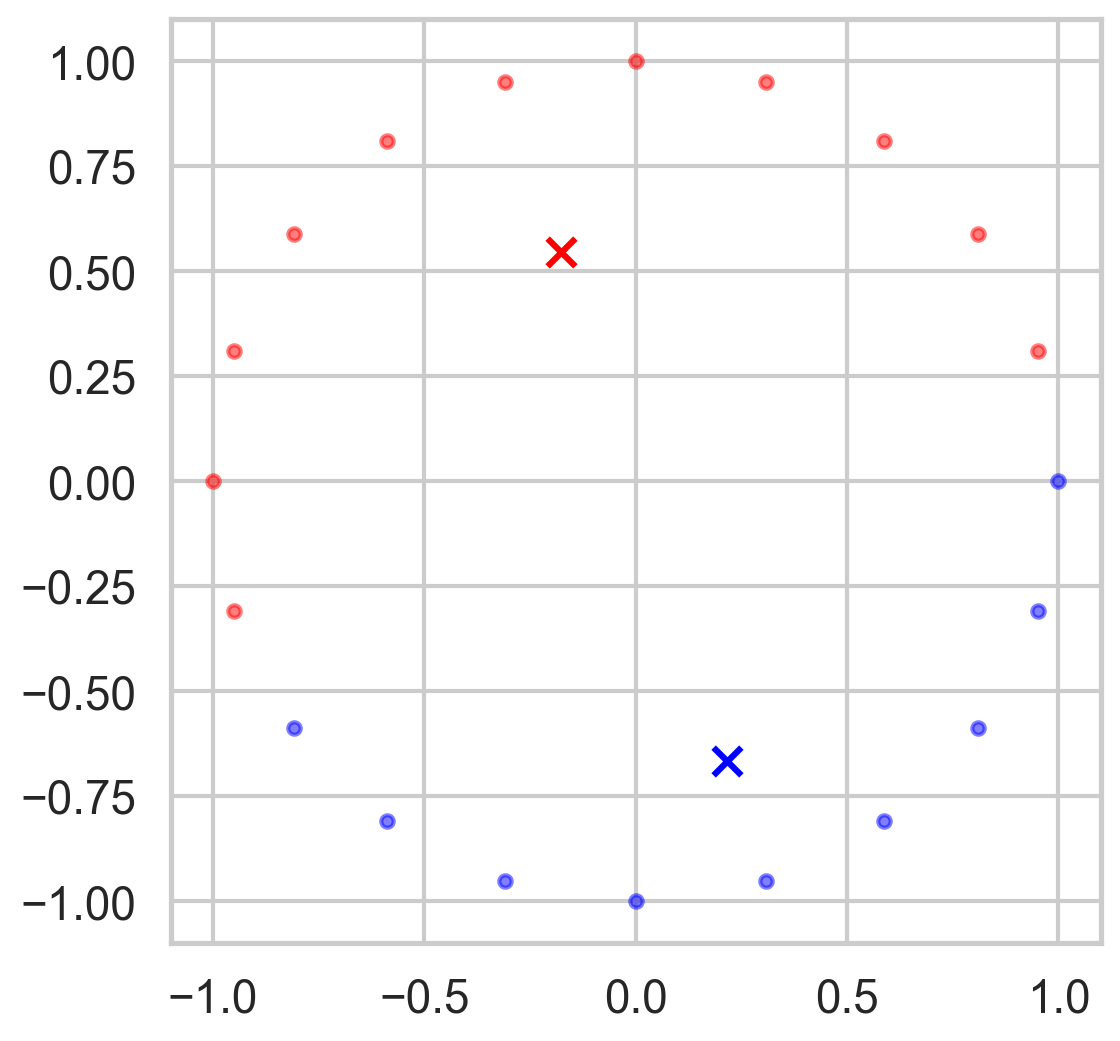

In [6]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

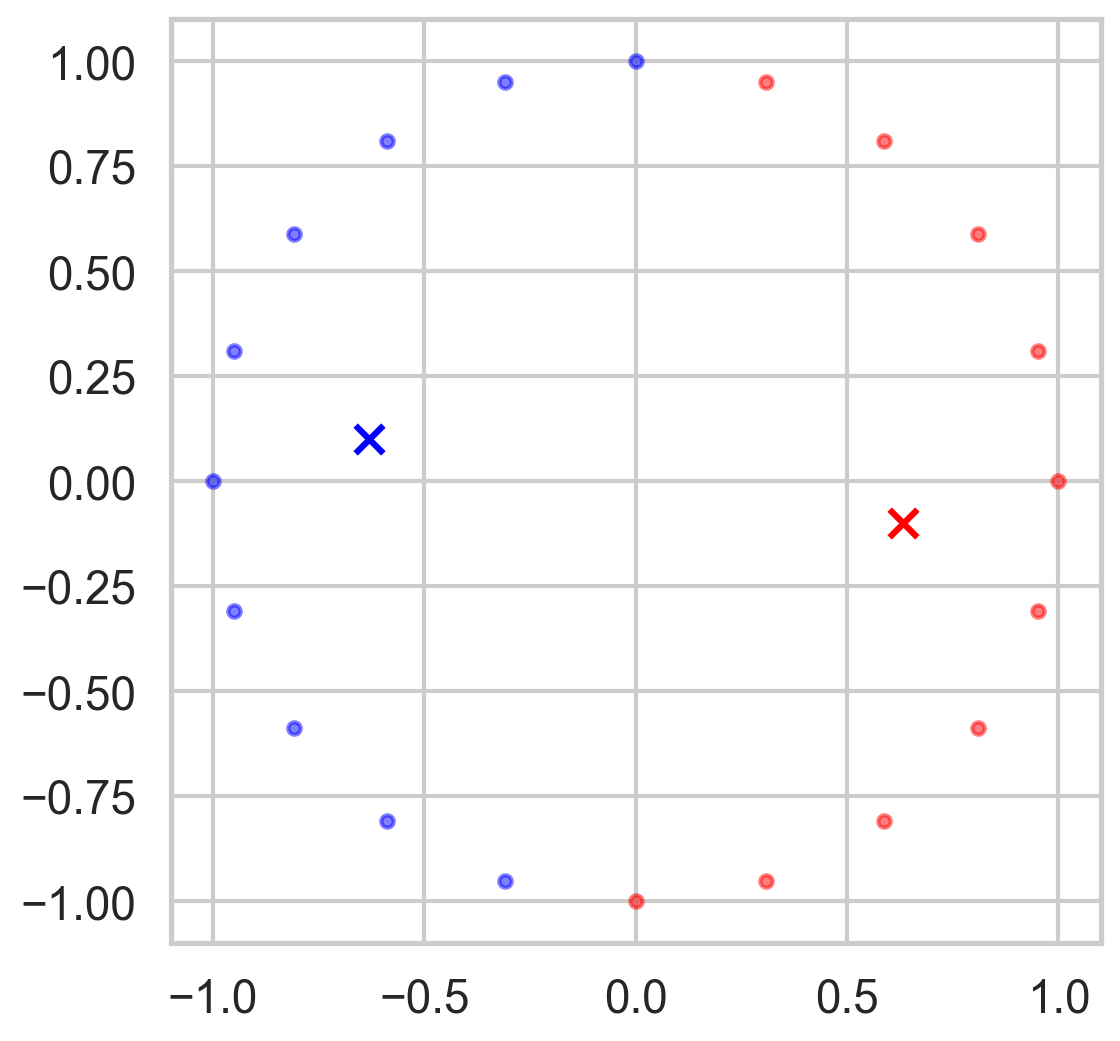

In [7]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

It is possible to find the best number of clusters by trying different values for K. Usually this can be done with gridsearch, but for illustration purposes it is shown here with a loop.

In the following section, multiple cluster blobs are generated centered at a chosen position. Since we synthesize the data, we know that there are 4 clusters. Then we can run multiple iterations of the KMeans fit for different values of K to see if the algorithm can recover this.

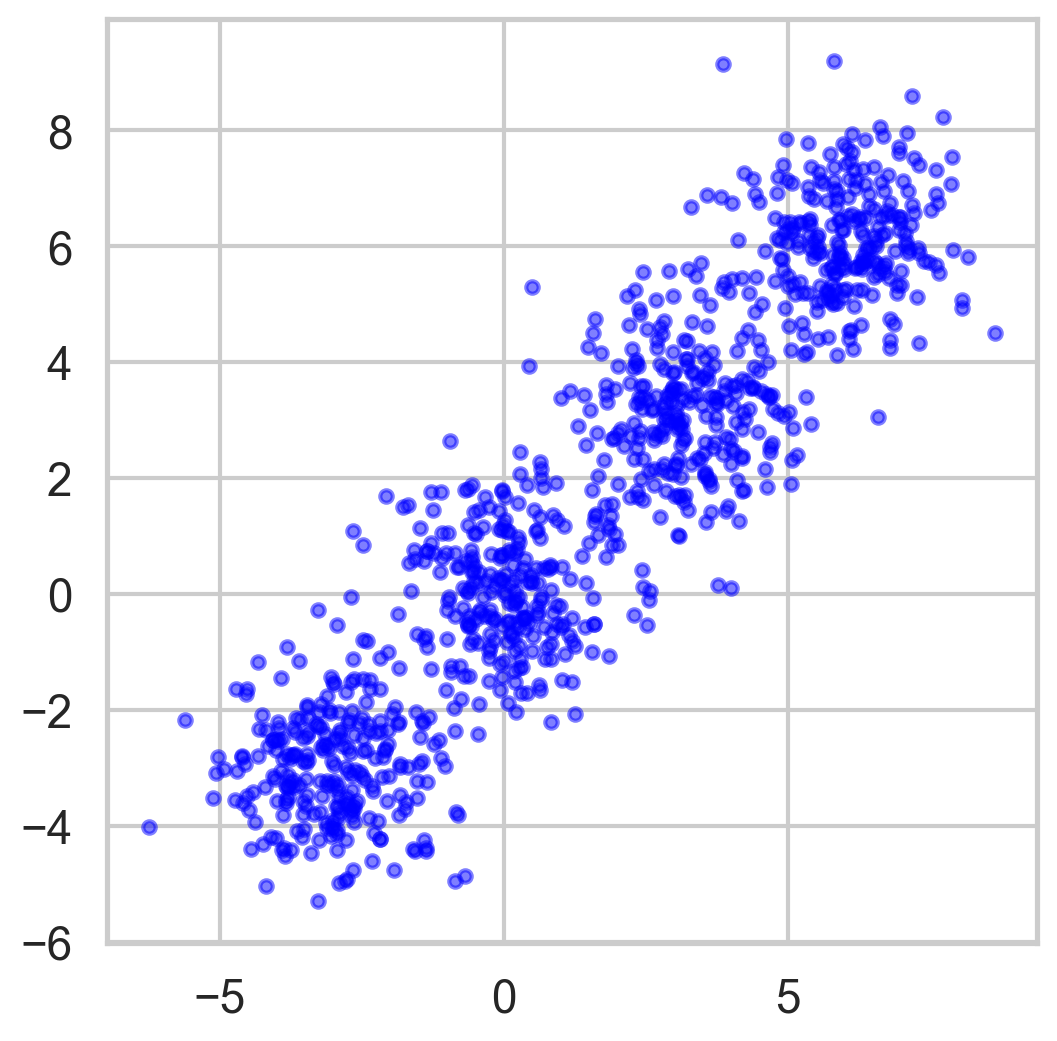

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

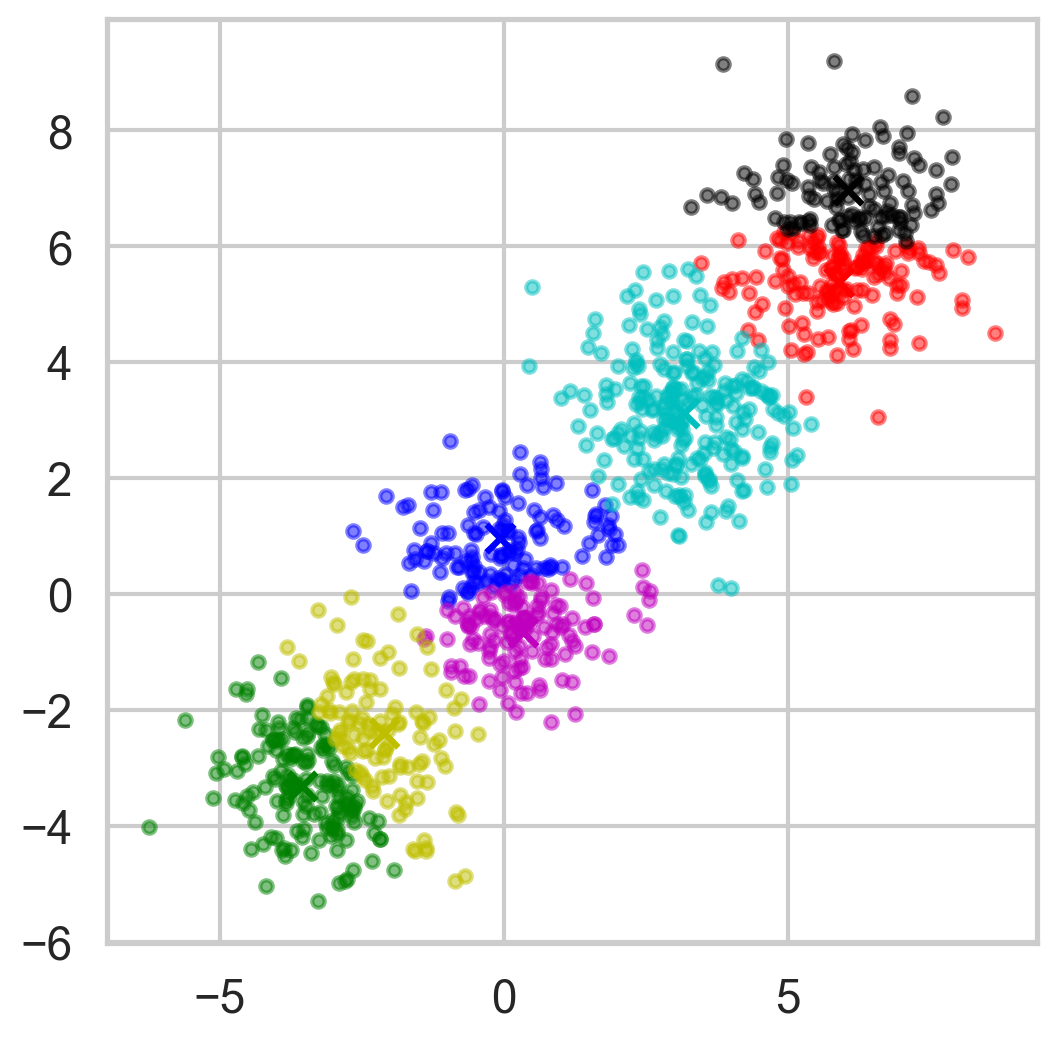

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

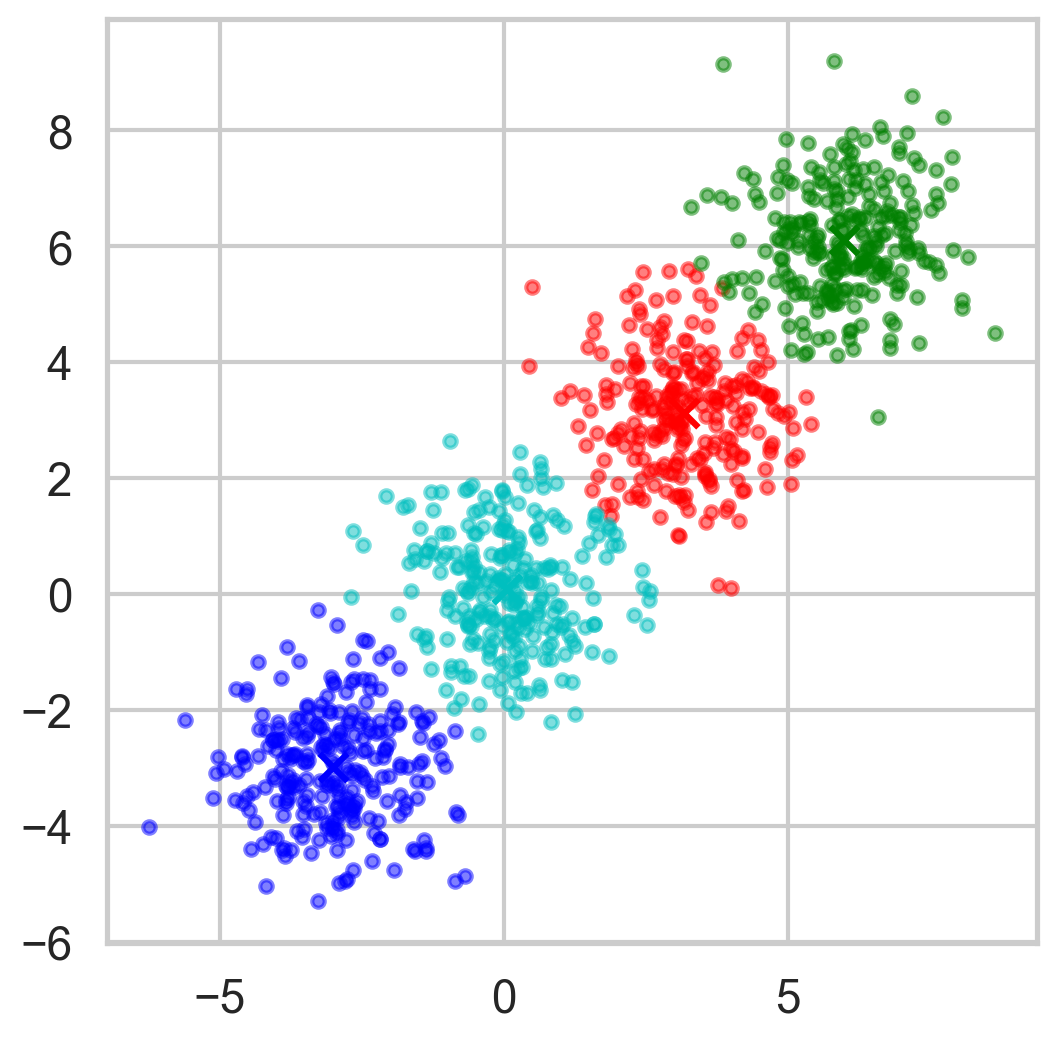

In [10]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

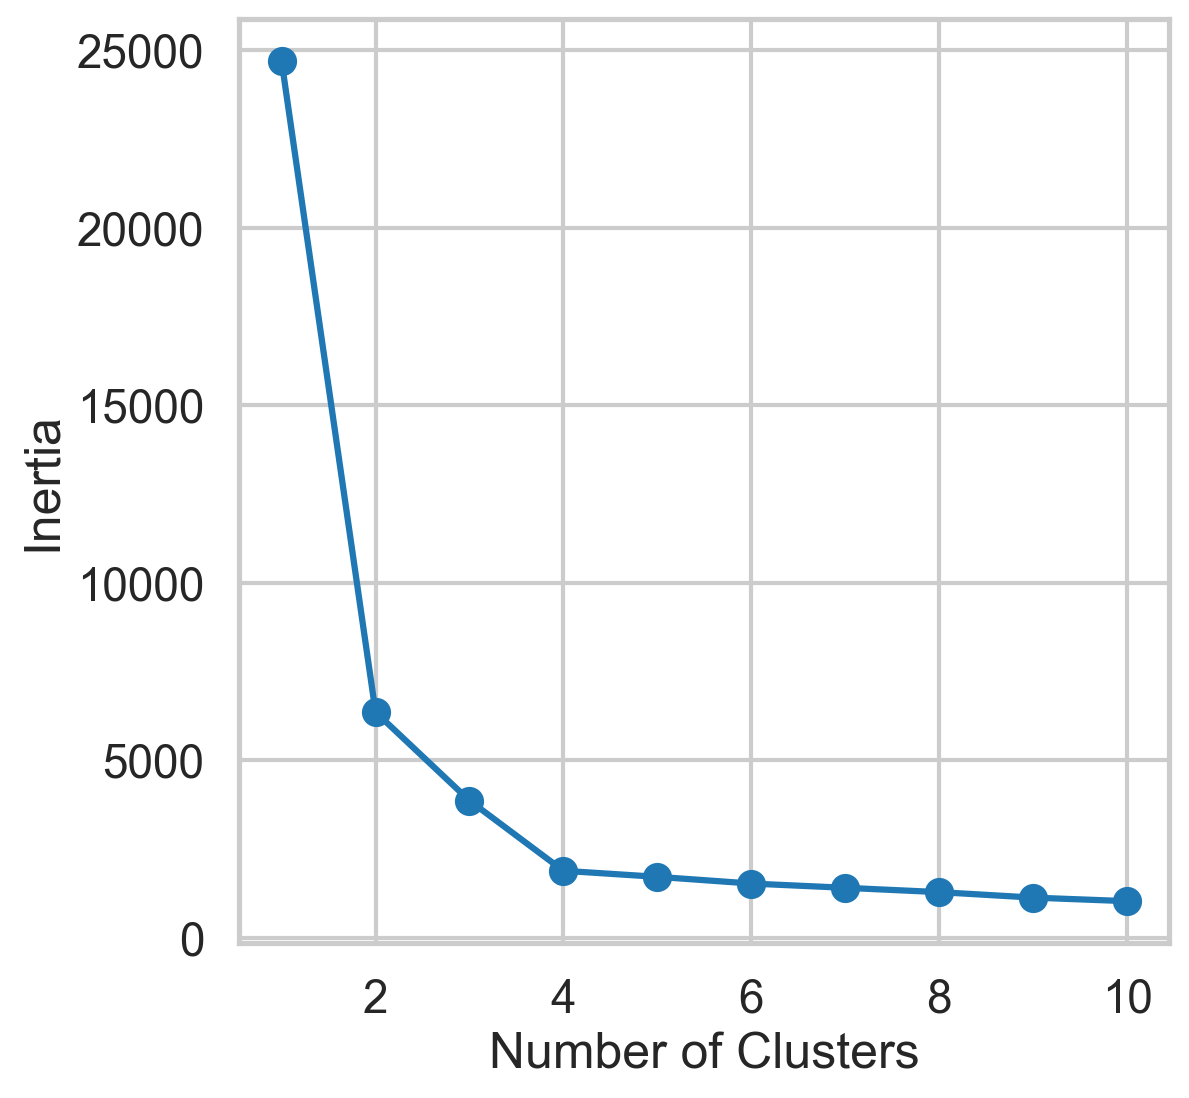

In [11]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

## Clustering image colors

(480, 640, 3)

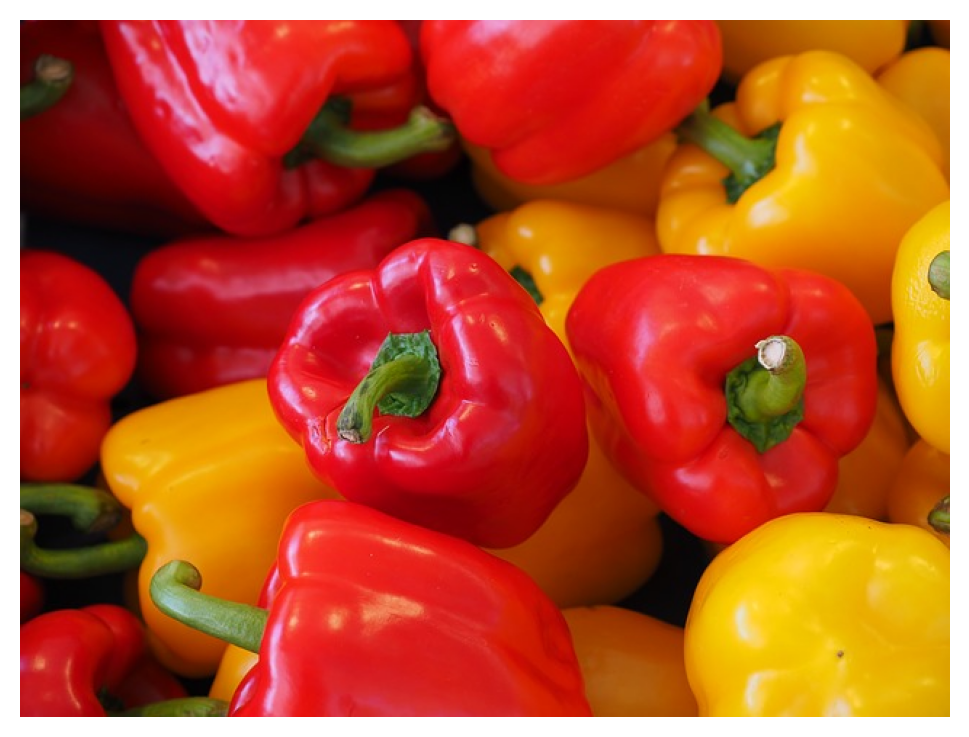

In [14]:
img = plt.imread('./data/peppers.jpg', format='jpeg')
plt.imshow(img)
plt.axis('off')
img.shape

In [21]:
img_flat = img.reshape(-1, 3)
img_flat[:5,:]
img_flat.shape

(307200, 3)

In [18]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

In [19]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

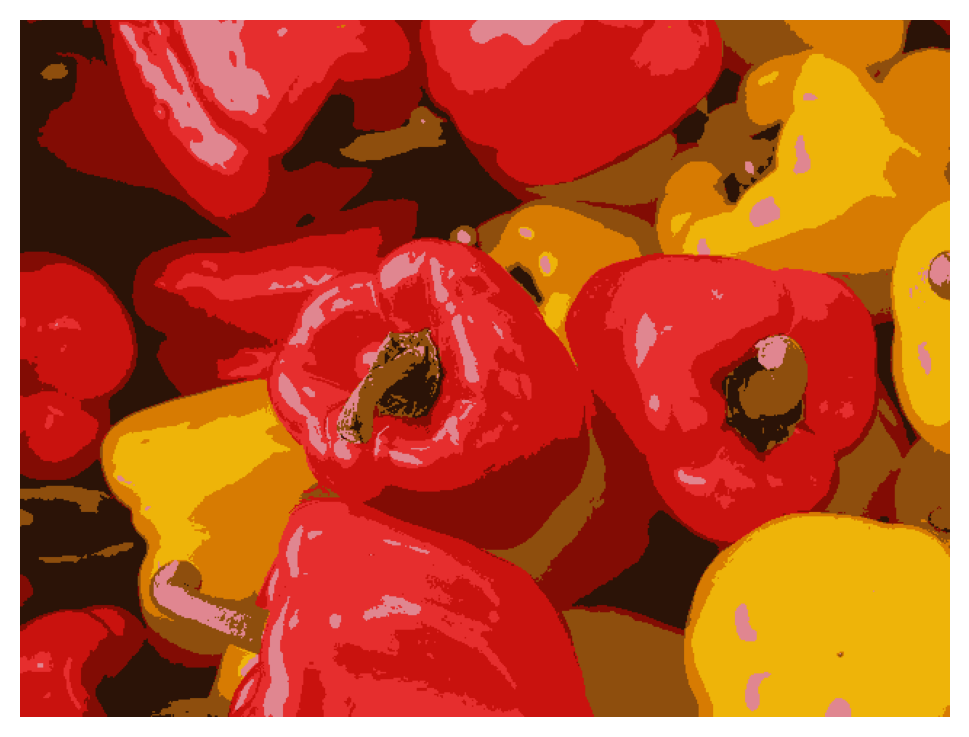

In [20]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

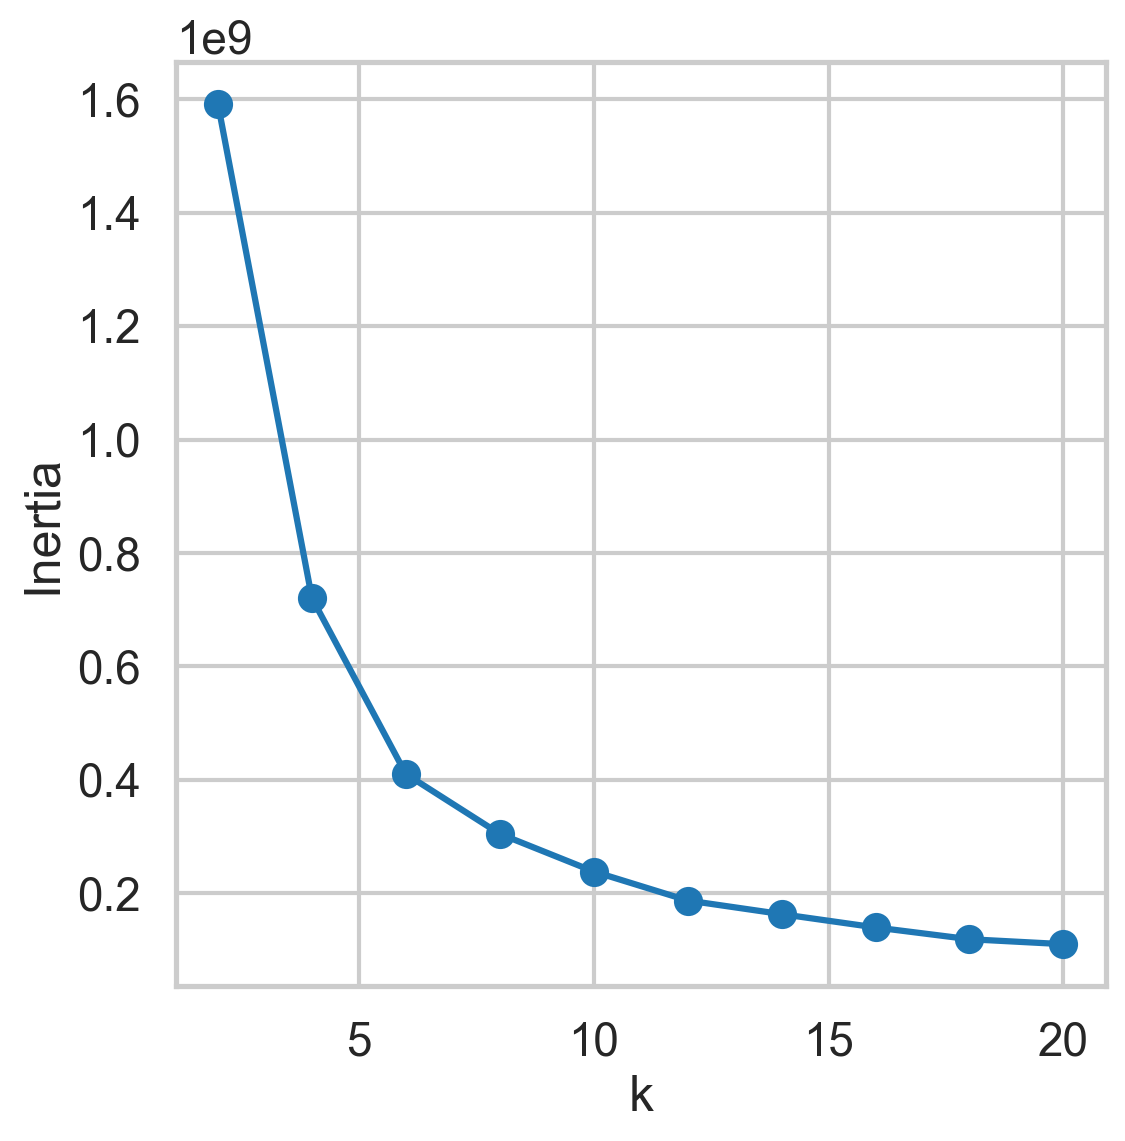

In [27]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_, silhouette_score(img_flat2, kmeans.predict(img_flat2))

k_vals = list(range(2,21,2))
img_list = []
inertia = []
sils = []

for k in k_vals:
#    print(k)
    img2, ine, silh = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)
    sils.append(silh)
    
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

There is no clear point where the amount of clusters is best. This is probably because there are so many colours that the space is essentially continuous, making the entire notion of clusters less meaningful. We can use other metrics in this case. like the [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

Text(0, 0.5, 'silhouette_score')

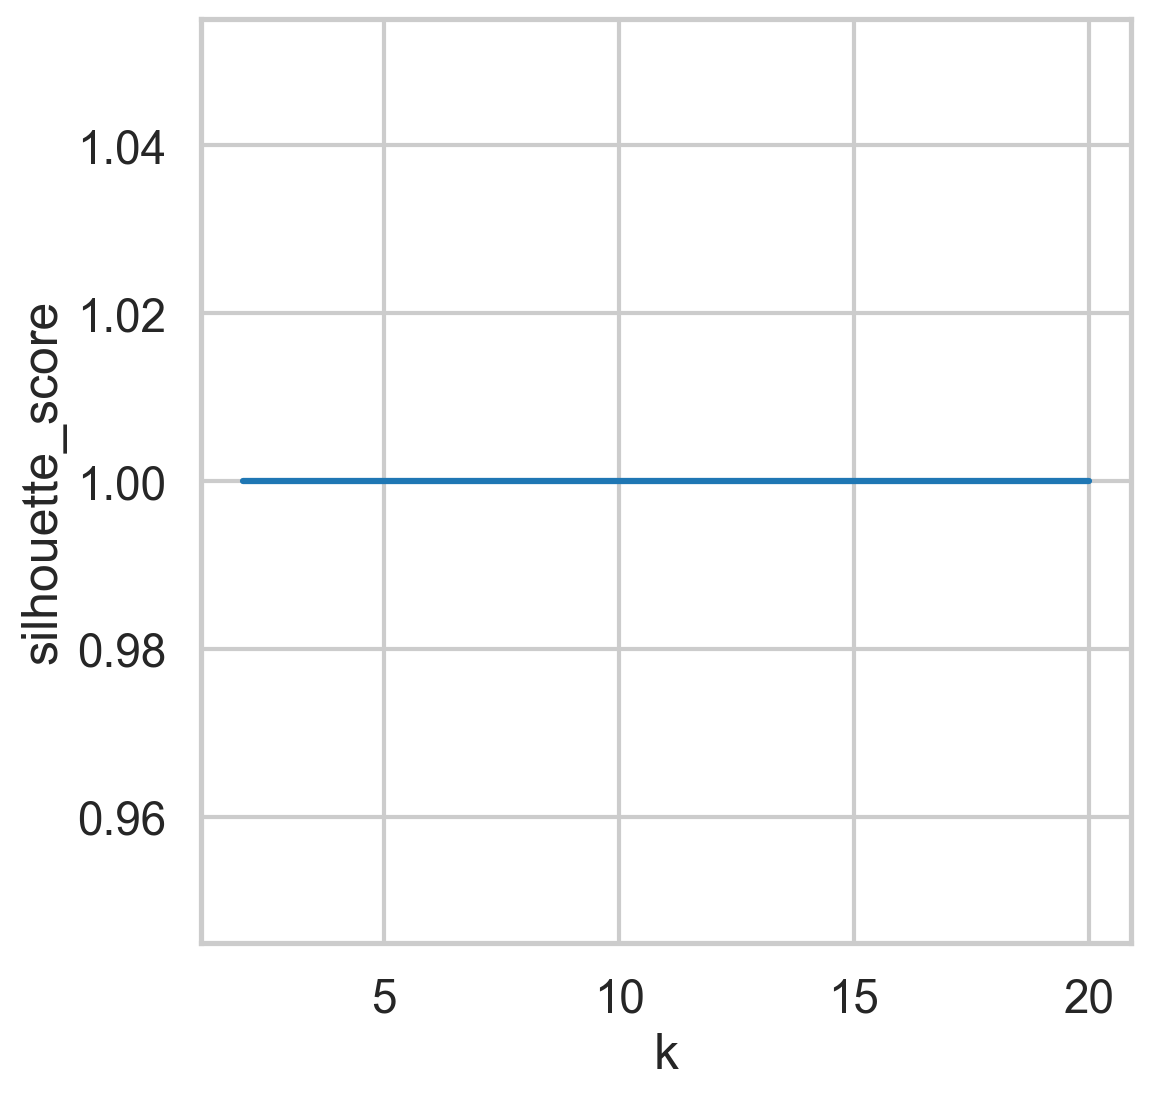

In [29]:
plt.plot(k_vals, sils)
plt.xlabel('k')
plt.ylabel('silhouette_score')

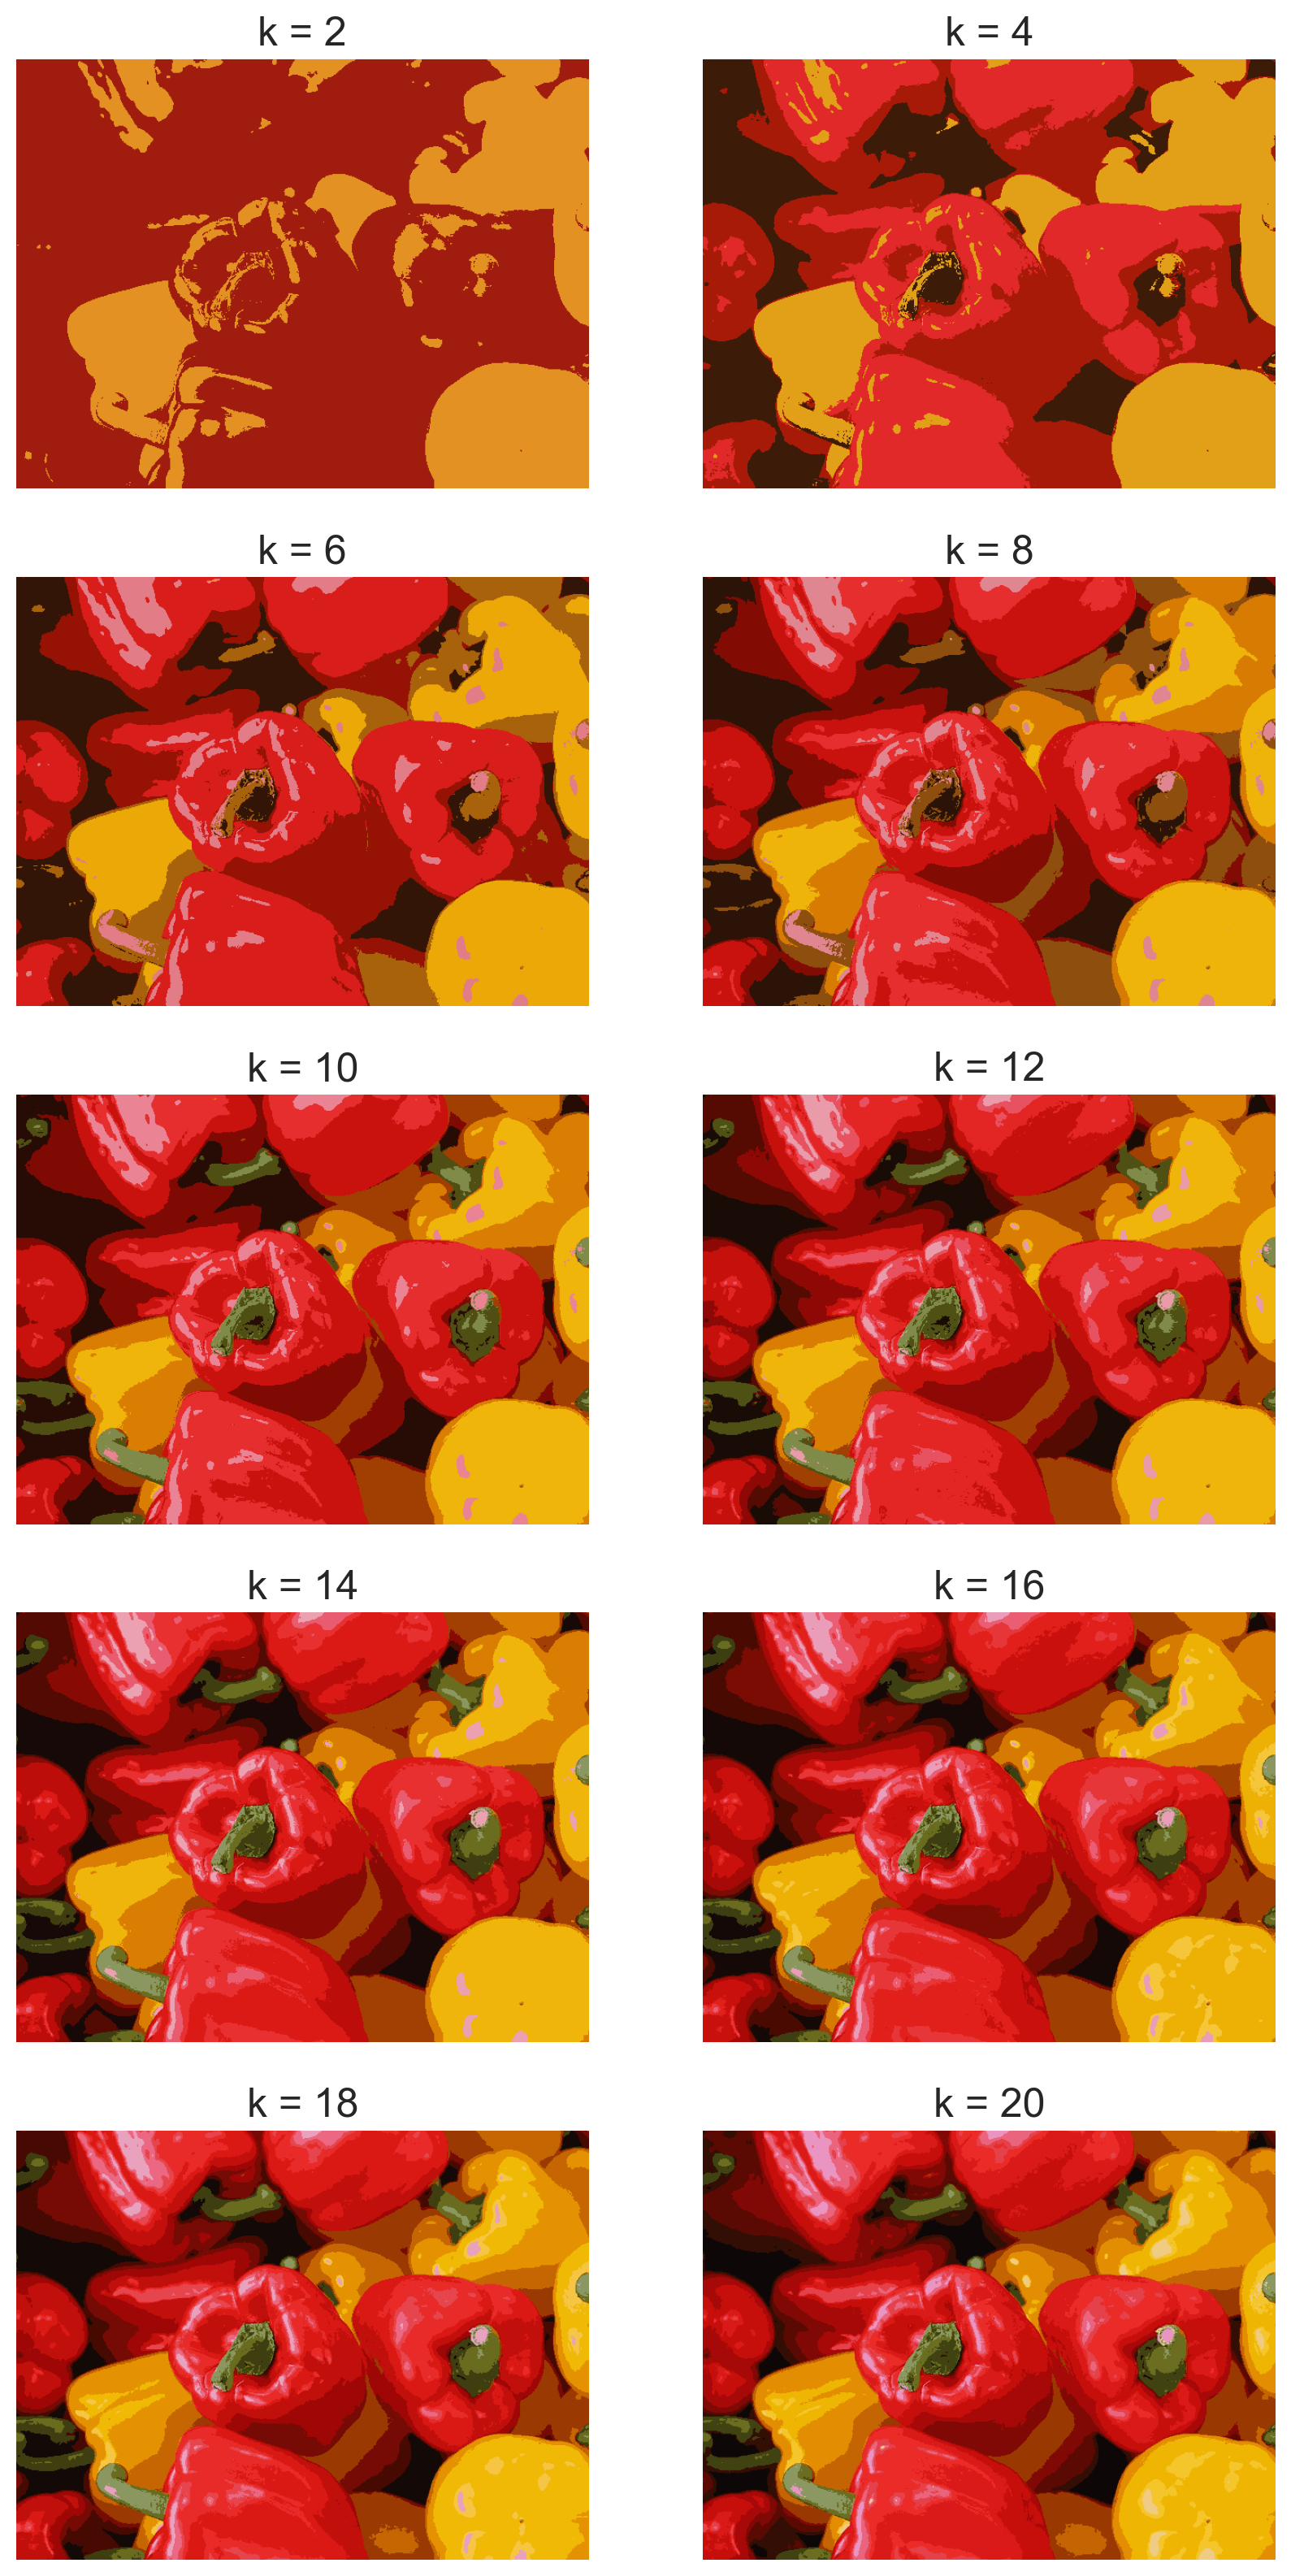

In [28]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');